In [1]:
import time
import socket
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from server_4x2 import objNetworkInterface

networkInterfaceObj = objNetworkInterface()

Starting the FPGA controller


FPGA controller is loaded.
Starting Sivers EVK controller
Available interfaces:
  ftdi://ftdi:4232:SNSP200048/1   (EVK06002)
  ftdi://ftdi:4232:SNSP200048/2   (EVK06002)
  ftdi://ftdi:4232:SNSP200048/3   (EVK06002)
  ftdi://ftdi:4232:SNSP200048/4   (EVK06002)

ftdi://ftdi:4232:SNSP200048
Setting frequency to 60.48 GHz
Temperature: 45.006 C
vco_vtune_atc_lo_th: 0x8f (1.570 V)
vco_tune_ctrl: 0x4
vco_tune_status [0x7e]: 0x7e
vco_tune_det_status[0] [1]: 0x3
vco_tune_freq_cnt [0x7ff +/-11]: 0x7ff
VCO tune OK.
Sivers EVK controller is loaded
Starting TCP server
Buffer size [Before]:16384
TCP server up...


In [3]:
networkInterfaceObj.send(mode= 'Sinusoid', freq=100, amp=(0.5**5)*(2**16-1)) # mode = 'Sinusoid'

In [4]:
mode = 'RXen1_TXen0'
networkInterfaceObj.siversControllerObj.setMode(mode)

(True, 'Success')

In [5]:
fc = 57.51e9
networkInterfaceObj.siversControllerObj.setFrequency(fc)

Setting frequency to 57.51 GHz
Temperature: 64.563 C
vco_vtune_atc_lo_th: 0x9f (1.746 V)
vco_tune_ctrl: 0x7
vco_tune_status [0x7e]: 0x7e
vco_tune_det_status[0] [1]: 0x3
vco_tune_freq_cnt [0x7ff +/-11]: 0x7fd
VCO tune OK.


(True, 'Success')

In [6]:
rx_gain_ctrl_bb1 = 0x33
rx_gain_ctrl_bb2 = 0x00
rx_gain_ctrl_bb3 = 0x33
rx_gain_ctrl_bfrf = 0x7F

networkInterfaceObj.siversControllerObj.setGainRX(rx_gain_ctrl_bb1, rx_gain_ctrl_bb2, rx_gain_ctrl_bb3, rx_gain_ctrl_bfrf)

(True, 'Success')

This part executes recv function and draws the received signals information on different beams that are all received from recv function

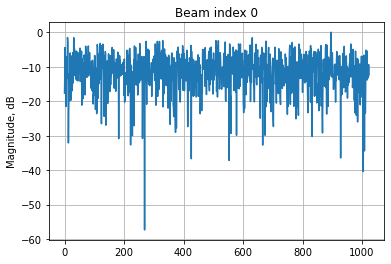

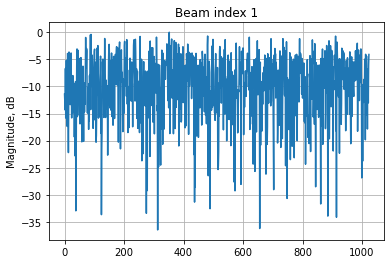

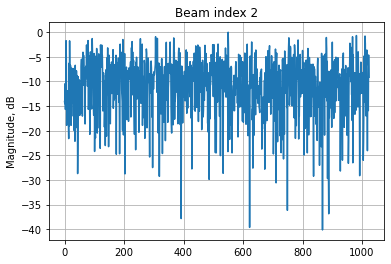

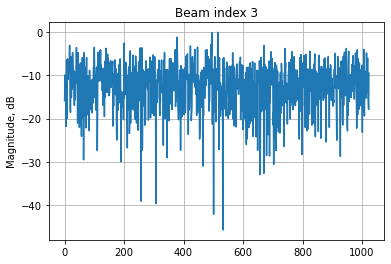

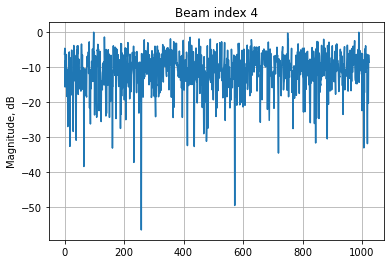

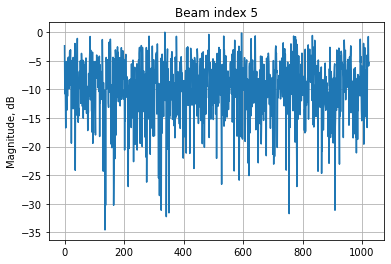

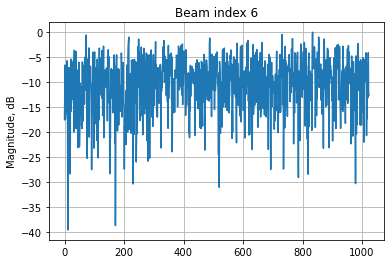

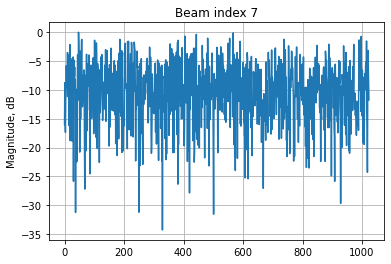

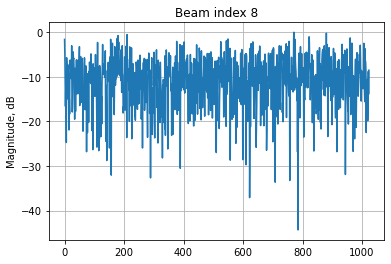

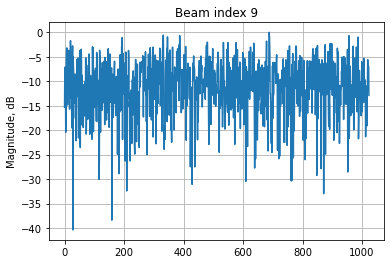

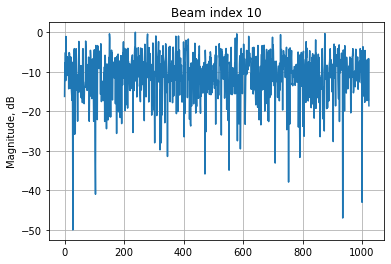

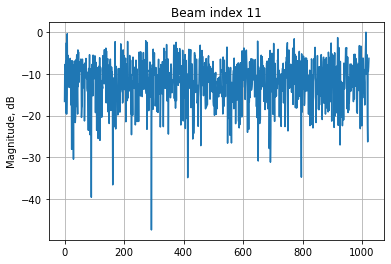

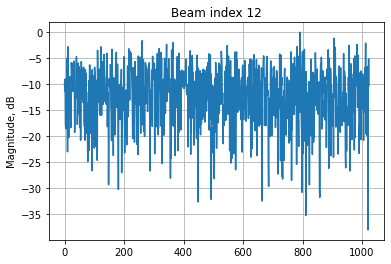

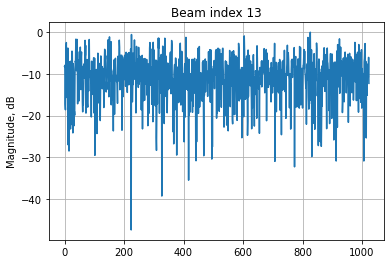

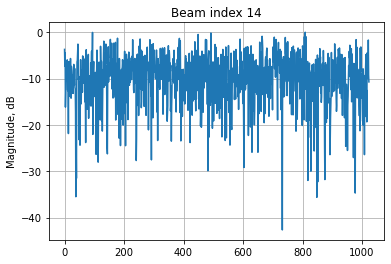

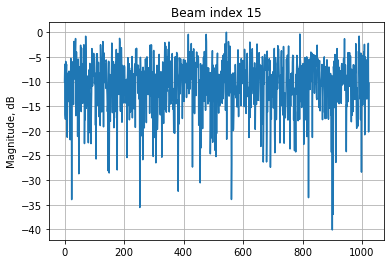

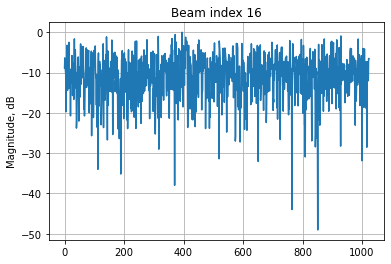

In [9]:
nbeams = 17
nbytes = 2
nread = 1024

rxtd = networkInterfaceObj.recv(1)
rxtd = rxtd[:nread*nbeams] + 1j*rxtd[nread*nbeams:]
rxtd = rxtd.reshape(nbeams, nread)


# for i in [0,7,16]:
#     plt.plot(np.abs(rxtd[i,:]))
# plt.grid(alpha=0.4)
# plt.legend(["-45","0","45"])
# plt.show()

for i in range(nbeams):
    mag = np.abs(rxtd[i, :])
    mag = mag / np.max(mag)
    mag_db = 20 * np.log10(mag + 1e-17)
    plt.plot(mag_db)
    plt.ylabel('Magnitude, dB')
    plt.title(f'Beam index {i}')
    plt.grid(0.4)
    plt.show()

This part executes recv_once function and gives back data in the correct shape, then draws the rxtd and rxfd signals received from recv_once function

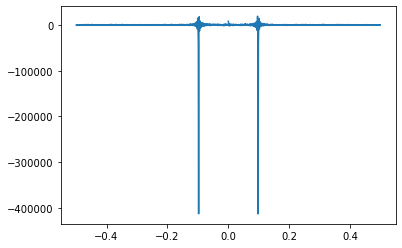

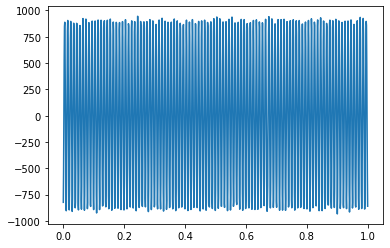

945.0


In [5]:
nbeams = 1
nbytes = 2
nread = 1024

rxtd = networkInterfaceObj.recv_once(1)
rxtd = rxtd.reshape(nbeams, nread)


rxtd = rxtd.flatten()
t = np.linspace(0,1,rxtd.shape[0])
rxfd = np.fft.fft(rxtd)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, rxfd.real)
# plt.plot(rxfd)
plt.show()
plt.plot(t,rxtd.real)
# plt.plot(t,rxtd)
# plt.xlim(0,10)
plt.show()
print(np.max(rxtd.real))

This part sketches TX and RX signals (got from recv_once function) in the frequency domain

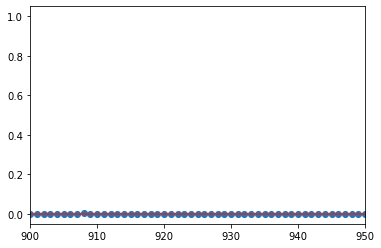

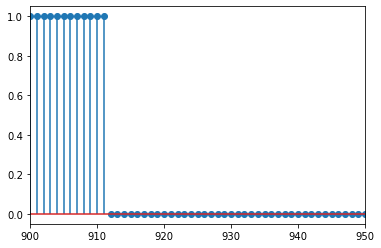

In [6]:
rxtd = networkInterfaceObj.recv_once()

txfd = np.fft.fftshift(networkInterfaceObj.txfd)
rxfd = np.fft.fft(rxtd)
rxfd[:10] = 0
rxfd[-10:] = 0
rxfd = np.roll(rxfd, 1)
rxfd = np.fft.fftshift(rxfd)
plt.stem(np.abs(rxfd)/np.max(np.abs(rxfd)))
plt.xlim([900, 950])
plt.show()
plt.stem(np.abs(txfd)/np.max(np.abs(txfd)))
# plt.xlim([100, 150])
plt.xlim([900, 950])
plt.show()